In [1]:
# importing libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

Size of an image is:  (540, 960, 3)
<class 'numpy.ndarray'>


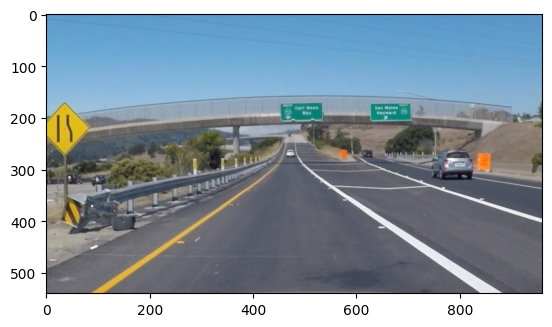

In [2]:
## reading an image
image = mpimg.imread('exit-ramp.jpg')
print("Size of an image is: ",image.shape)
print(type(image))
plt.imshow(image)
plt.show()

### Detect Edges: apply canny edge Detector
* **Steps:**
    *  convert into grayscale
    *  remove the noise
    * select the low and high threshold

Size of canny_edges_image:  (540, 960)


' \nthe below image shown is not properly black and white bcz it has only one color channel\nTo view the image in black and white add cmap="gray" in plt.imshow function\n'

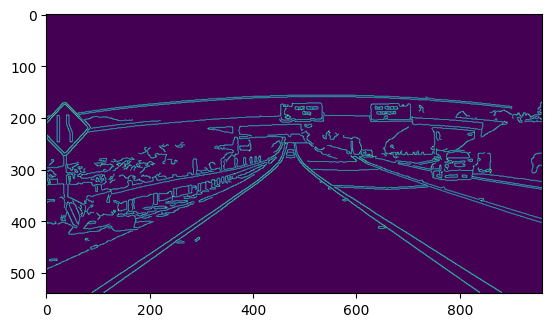

In [3]:
# grayscale converion
grayscale_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# remove the noise by applying Gaussian transformation (5,5) Kernel
smooth_image = cv2.GaussianBlur(grayscale_image, (5,5),0)

# define low and high threshold
low_threshold = 50
high_threshold = 150
canny_edges_image = cv2.Canny(smooth_image, low_threshold, high_threshold)
print("Size of canny_edges_image: ", canny_edges_image.shape)
plt.imshow(canny_edges_image)
""" 
the below image shown is not properly black and white bcz it has only one color channel
To view the image in black and white add cmap="gray" in plt.imshow function
"""

### Detect Lines: Hough Transform

In [4]:
# hough transform parameters
rho = 1
theta = np.pi/180
threshold = 1    # to label the detected no of edges as line
min_line_length = 10
max_line_gap = 1
line_image = np.copy(image)*0 # blank image to show lines

# apply hough transform
hough_lines = cv2.HoughLinesP(canny_edges_image, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

### show blank image

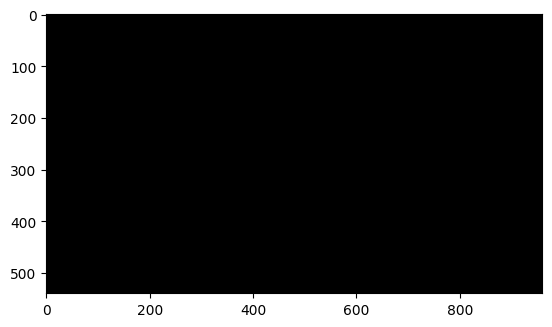

In [5]:
plt.imshow(line_image)

### Plot lines on image

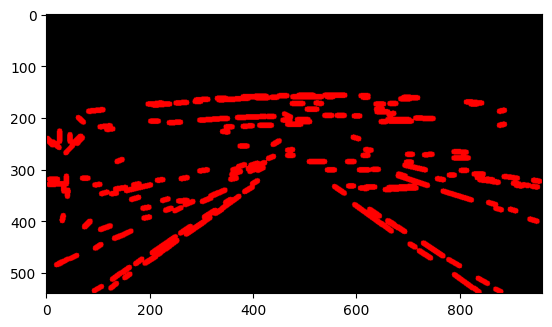

In [6]:
for line in hough_lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image, (x1,y1), (x2,y2), (255,0,0), 10)
    
## show image
plt.imshow(line_image)

## combine the line_image and edge image

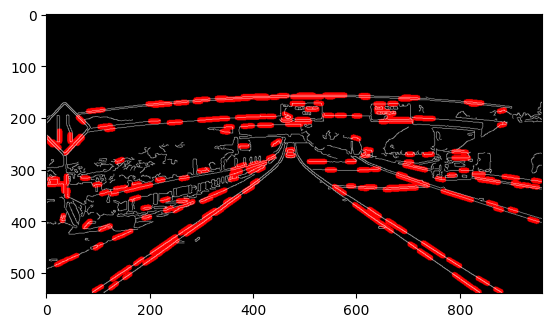

In [7]:
# blend the line_image and canny_edges_image
"""
using cv2.addweighted() function for this 
generic syntax:
    output = cv2.addWeighted(source1, alpha, source2, beta, gamma[, dst[, dtype]])
    output is the image where we will multiply souce1 with the alpha value and the second source with 
    beta value. Gamma value is added to this value. 

###imp points###
source1 and source2 have same size and channels
"""
canny_edges_image_col = np.dstack((canny_edges_image, canny_edges_image, canny_edges_image))
blend_image = cv2.addWeighted(canny_edges_image_col,0.8, line_image,1,0)

# show the image
plt.imshow(blend_image)

## Improving the above detected Lines--> show lines only on lane

### Define mask

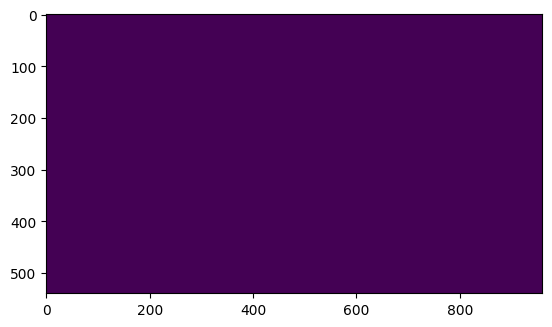

In [8]:
mask_image = np.zeros_like(canny_edges_image)
plt.imshow(mask_image)

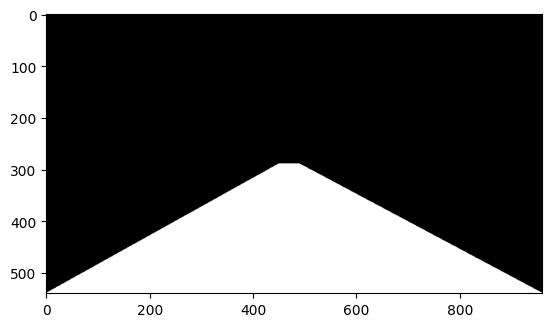

In [9]:
## mask the image using four sided polgon
"""
for info:
(x,y) form for vertices of polygon
order of input matters
"""
y,x,_ = image.shape
bottom_left = (0,y)
top_left = (450,290)
top_right = (490,290)
bottom_right = (x,y)
vertices = np.array([[bottom_left, top_left, top_right, bottom_right]])
cv2.fillPoly(mask_image, vertices, 255)
plt.imshow(mask_image,cmap="gray")

### Use mask image and detect the lane lines

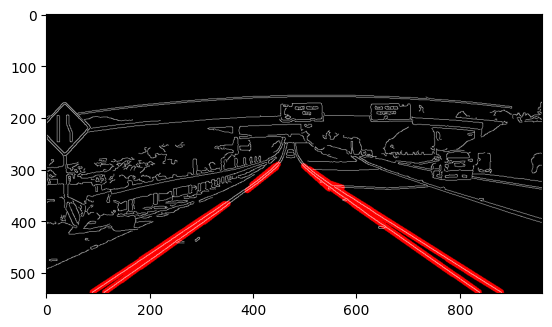

In [10]:
# join the result of canny_edges and mask_image
masked_edges = cv2.bitwise_and(canny_edges_image, mask_image)

# define new Hough transform parameters
rho = 2
theta = np.pi/180 
threshold = 15
min_line_length =40
max_line_gap = 20 

line_image = np.copy(image)*0 

# apply the new hough transform on masked image edges
hough_lines_v2= cv2.HoughLinesP(masked_edges, rho,theta, threshold, np.array([]), min_line_length, max_line_gap)

# draw the hough lines on the line_image
for line in hough_lines_v2:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image, (x1,y1), (x2,y2), (255,0,0), 10)
        
# blend the images canny_edges an line_image
lane_edge = cv2.addWeighted(canny_edges_image_col,0.8,line_image,1,0)
plt.imshow(lane_edge)
